C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\22749\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

Merged Data Date Range:
2020-01-01 00:00:00 2022-12-01 00:00:00
            Change_Rate
Date                   
2020-01-01     1.000000
2020-02-01    -0.082319
2020-03-01    -0.123514
2020-04-01     0.128194
2020-05-01     0.047627
2020-06-01     0.019888
2020-07-01     0.056385
2020-08-01     0.071880
2020-09-01    -0.037997
2020-10-01    -0.026593
2020-11-01     0.109464
2020-12-01     0.038449
2021-01-01    -0.010096
2021-02-01     0.027574
2021-03-01     0.043796
2021-04-01     0.053369
2021-05-01     0.006984
2021-06-01     0.023345
2021-07-01     0.023754
2021-08-01     0.030406
2021-09-01    -0.046509
2021-10-01     0.070061
2021-11-01    -0.006929
2021-12-01     0.044816
2022-01-01    -0.051747
2022-02-01    -0.029942
2022-03-01     0.037130
2022-04-01    -0.087202
2022-05-01     0.001834
2022-06-01    -0.082544
2022-07-01     0.092204
2022-08-01    -0.040781
2022-09-01    -0.092100
2022-10-01     0.080961
2022-11-01     0.055885
2022-12-01    -0.057615
Instructions for updatin

Epoch 3/100
24/24 - 0s - loss: 401.6155 - val_loss: 367.9399
Epoch 4/100
24/24 - 0s - loss: 329.9134 - val_loss: 292.0085
Epoch 5/100
24/24 - 0s - loss: 245.3267 - val_loss: 216.8005
Epoch 6/100
24/24 - 0s - loss: 187.3182 - val_loss: 147.2373
Epoch 7/100
24/24 - 0s - loss: 111.8462 - val_loss: 92.1178
Epoch 8/100
24/24 - 0s - loss: 73.8075 - val_loss: 64.9671
Epoch 9/100
24/24 - 0s - loss: 118.6514 - val_loss: 60.8290
Epoch 10/100
24/24 - 0s - loss: 190.9609 - val_loss: 62.7259
Epoch 11/100
24/24 - 0s - loss: 85.5689 - val_loss: 63.6872
Epoch 12/100
24/24 - 0s - loss: 118.4444 - val_loss: 63.6356
Epoch 13/100
24/24 - 0s - loss: 93.8183 - val_loss: 65.8534
Epoch 14/100
24/24 - 0s - loss: 67.7974 - val_loss: 72.5249
Epoch 15/100
24/24 - 0s - loss: 49.8443 - val_loss: 82.6503
Epoch 16/100
24/24 - 0s - loss: 43.4209 - val_loss: 94.1831
Epoch 17/100
24/24 - 0s - loss: 37.8449 - val_loss: 104.8426
Epoch 18/100
24/24 - 0s - loss: 30.7014 - val_loss: 113.9479
Epoch 19/100
24/24 - 1s - loss: 6

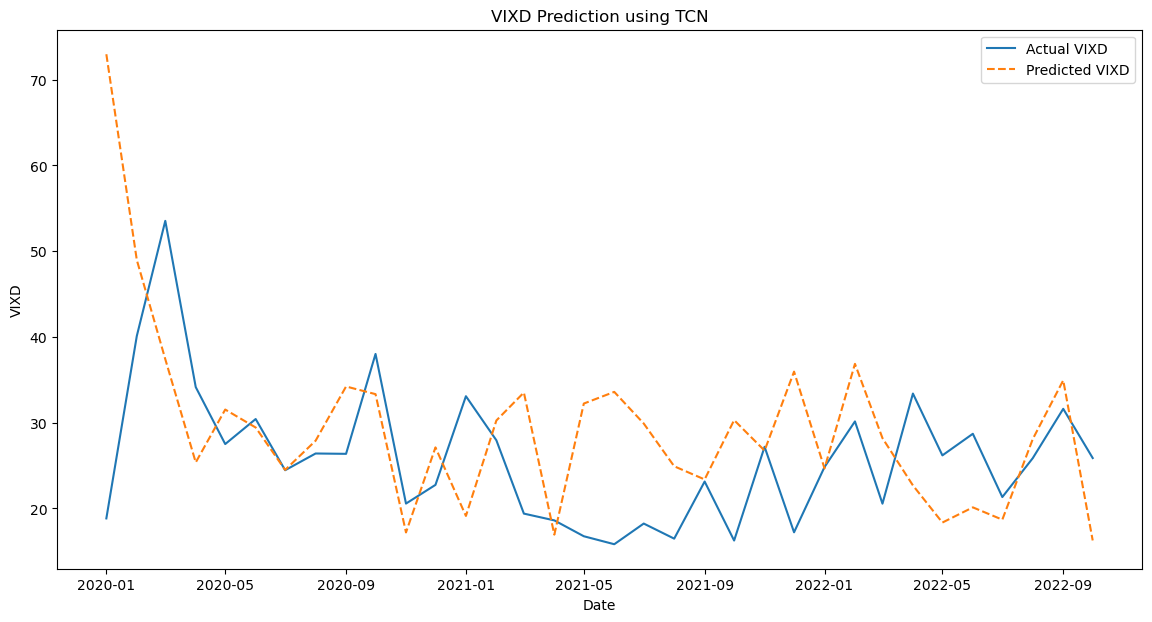

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tcn import TCN, tcn_full_summary  # Import TCN

# 加载情绪结果文件
finbert_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 加载市场指数数据
spxd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_SPXD.xlsx', sheet_name='Price Data')
spxtrd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_SPXTRD2.xlsx')
vixd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_VIXD.xlsx', sheet_name='Price Data')

# 确保日期列为datetime类型
finbert_data['Date'] = pd.to_datetime(finbert_data['Date'])
textblob_data['Date'] = pd.to_datetime(textblob_data['Date'])
vader_data['Date'] = pd.to_datetime(vader_data['Date'])
spxd_data['Date'] = pd.to_datetime(spxd_data['Date'])
spxtrd_data['Date'] = pd.to_datetime(spxtrd_data['Date'])
vixd_data['Date'] = pd.to_datetime(vixd_data['Date'])

# 删除2023年的数据
finbert_data = finbert_data[finbert_data['Date'].dt.year != 2023]
textblob_data = textblob_data[textblob_data['Date'].dt.year != 2023]
vader_data = vader_data[vader_data['Date'].dt.year != 2023]
spxd_data = spxd_data[spxd_data['Date'].dt.year != 2023]
spxtrd_data = spxtrd_data[spxtrd_data['Date'].dt.year != 2023]
vixd_data = vixd_data[vixd_data['Date'].dt.year != 2023]

# 合并情绪得分数据
sentiment_data = pd.merge(finbert_data, textblob_data, on='Date', how='outer', suffixes=('_finbert', '_textblob'))
sentiment_data = pd.merge(sentiment_data, vader_data, on='Date', how='outer')

# 合并市场指数数据
market_data = pd.merge(spxd_data, spxtrd_data, on='Date', how='outer', suffixes=('_spxd', '_spxtrd'))
market_data = pd.merge(market_data, vixd_data, on='Date', how='outer')

# 合并所有数据
data = pd.merge(sentiment_data, market_data, on='Date', how='outer')
data.set_index('Date', inplace=True)

# 检查合并后的日期范围
print("Merged Data Date Range:")
print(data.index.min(), data.index.max())
print(data[['Change_Rate']])

X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'SPXD_Mean', 'SPXTRD_Mean','Change_Rate']]
y = data['VIXD_Mean'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Overall Positive Sentiment': 0.5,
    'Overall Neutral Sentiment': 0.1,
    'Overall Negative Sentiment': 0.5,
    'Polarity': 0.5,
    'Subjectivity': 0.1,
    'Positive': 0.3,
    'Neutral': 0.1,
    'Negative': 0.3,
    'SPXD_Mean': 0.7,
    'SPXTRD_Mean': 0.7,
    'Change_Rate':1
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集和测试集
split_date = '2022-01-01'
split_date = pd.to_datetime(split_date)
X_train = X_scaled[data.index < split_date]
X_test = X_scaled[data.index >= split_date]
y_train = y[data.index < split_date]
y_test = y[data.index >= split_date]

# 重塑数据以适应TCN输入 [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# 构建TCN模型
model = Sequential()
model.add(TCN(input_shape=(X_train.shape[1], X_train.shape[2])))  # TCN层
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 提前停止
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping], verbose=2, shuffle=False)

# 评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 可视化预测结果
predicted_vixd = model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1])))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['VIXD_Mean'], label='Actual VIXD')
plt.plot(data.index, predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()


Merged Data Date Range:
2020-01-01 00:00:00 2022-12-01 00:00:00
            Change_Rate
Date                   
2020-01-01     1.000000
2020-02-01    -0.082319
2020-03-01    -0.123514
2020-04-01     0.128194
2020-05-01     0.047627
2020-06-01     0.019888
2020-07-01     0.056385
2020-08-01     0.071880
2020-09-01    -0.037997
2020-10-01    -0.026593
2020-11-01     0.109464
2020-12-01     0.038449
2021-01-01    -0.010096
2021-02-01     0.027574
2021-03-01     0.043796
2021-04-01     0.053369
2021-05-01     0.006984
2021-06-01     0.023345
2021-07-01     0.023754
2021-08-01     0.030406
2021-09-01    -0.046509
2021-10-01     0.070061
2021-11-01    -0.006929
2021-12-01     0.044816
2022-01-01    -0.051747
2022-02-01    -0.029942
2022-03-01     0.037130
2022-04-01    -0.087202
2022-05-01     0.001834
2022-06-01    -0.082544
2022-07-01     0.092204
2022-08-01    -0.040781
2022-09-01    -0.092100
2022-10-01     0.080961
2022-11-01     0.055885
2022-12-01    -0.057615
Train on 20 samples, val

Epoch 9/100
20/20 - 0s - loss: 162.3672 - val_loss: 9.9493
Epoch 10/100
20/20 - 0s - loss: 117.7121 - val_loss: 29.2719
Epoch 11/100
20/20 - 0s - loss: 134.7920 - val_loss: 73.3212
Epoch 12/100
20/20 - 0s - loss: 104.2735 - val_loss: 119.2068
Epoch 13/100
20/20 - 0s - loss: 196.5439 - val_loss: 126.8585
Epoch 14/100
20/20 - 0s - loss: 189.5465 - val_loss: 110.0533
Epoch 15/100
20/20 - 0s - loss: 184.0666 - val_loss: 81.2251
Epoch 16/100
20/20 - 0s - loss: 122.7200 - val_loss: 55.6625
Epoch 17/100
20/20 - 0s - loss: 111.6788 - val_loss: 36.6665
Epoch 18/100
20/20 - 0s - loss: 93.8152 - val_loss: 25.2522
Epoch 19/100
20/20 - 1s - loss: 72.9879 - val_loss: 20.7970
Mean Squared Error: 123.70563607740931
R^2 Score: -5.513672168779158


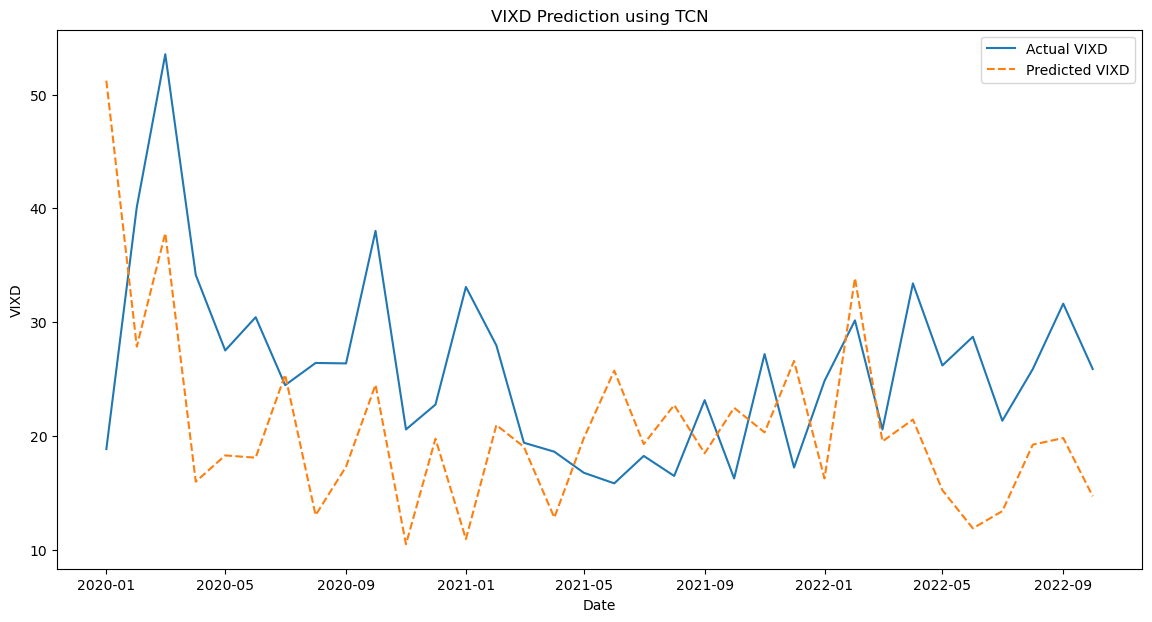

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tcn import TCN, tcn_full_summary  # Import TCN

# 加载情绪结果文件
finbert_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 加载市场指数数据
spxd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_SPXD.xlsx', sheet_name='Price Data')
spxtrd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_SPXTRD2.xlsx')
vixd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/modified_VIXD.xlsx', sheet_name='Price Data')

# 确保日期列为datetime类型
finbert_data['Date'] = pd.to_datetime(finbert_data['Date'])
textblob_data['Date'] = pd.to_datetime(textblob_data['Date'])
vader_data['Date'] = pd.to_datetime(vader_data['Date'])
spxd_data['Date'] = pd.to_datetime(spxd_data['Date'])
spxtrd_data['Date'] = pd.to_datetime(spxtrd_data['Date'])
vixd_data['Date'] = pd.to_datetime(vixd_data['Date'])

# 删除2023年的数据
finbert_data = finbert_data[finbert_data['Date'].dt.year != 2023]
textblob_data = textblob_data[textblob_data['Date'].dt.year != 2023]
vader_data = vader_data[vader_data['Date'].dt.year != 2023]
spxd_data = spxd_data[spxd_data['Date'].dt.year != 2023]
spxtrd_data = spxtrd_data[spxtrd_data['Date'].dt.year != 2023]
vixd_data = vixd_data[vixd_data['Date'].dt.year != 2023]

# 合并情绪得分数据
sentiment_data = pd.merge(finbert_data, textblob_data, on='Date', how='outer', suffixes=('_finbert', '_textblob'))
sentiment_data = pd.merge(sentiment_data, vader_data, on='Date', how='outer')

# 合并市场指数数据
market_data = pd.merge(spxd_data, spxtrd_data, on='Date', how='outer', suffixes=('_spxd', '_spxtrd'))
market_data = pd.merge(market_data, vixd_data, on='Date', how='outer')

# 合并所有数据
data = pd.merge(sentiment_data, market_data, on='Date', how='outer')
data.set_index('Date', inplace=True)

# 检查合并后的日期范围
print("Merged Data Date Range:")
print(data.index.min(), data.index.max())
print(data[['Change_Rate']])

X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'SPXD_Mean', 'SPXTRD_Mean','Change_Rate']]
y = data['VIXD_Mean'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Overall Positive Sentiment': 0.5,
    'Overall Neutral Sentiment': 0.1,
    'Overall Negative Sentiment': 0.5,
    'Polarity': 0.5,
    'Subjectivity': 0.1,
    'Positive': 0.3,
    'Neutral': 0.1,
    'Negative': 0.3,
    'SPXD_Mean': 0.7,
    'SPXTRD_Mean': 0.7,
    'Change_Rate':1
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集和测试集
split_date = '2022-01-01'
split_date = pd.to_datetime(split_date)
X_train = X_scaled[data.index < split_date]
X_test = X_scaled[data.index >= split_date]
y_train = y[data.index < split_date]
y_test = y[data.index >= split_date]

# 从训练集中划分出验证集
validation_split = 0.2
val_size = int(len(X_train) * validation_split)
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

# 重塑数据以适应TCN输入 [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# 构建TCN模型
model = Sequential()
model.add(TCN(input_shape=(X_train.shape[1], X_train.shape[2])))  # TCN层
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 提前停止
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping], verbose=2, shuffle=False)

# 评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 可视化预测结果
predicted_vixd = model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1])))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['VIXD_Mean'], label='Actual VIXD')
plt.plot(data.index, predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()


Merged Data Date Range:
2021-12-17 00:00:00 2022-12-30 00:00:00
Train on 155 samples, validate on 52 samples
Epoch 1/1000
155/155 [==============================] - 5s 30ms/sample - loss: 670.6083 - val_loss: 610.0651
Epoch 2/1000
155/155 [==============================] - 0s 457us/sample - loss: 655.8296 - val_loss: 592.7305
Epoch 3/1000
155/155 [==============================] - 0s 490us/sample - loss: 634.3116 - val_loss: 566.2490
Epoch 4/1000
155/155 [==============================] - 0s 425us/sample - loss: 601.1050 - val_loss: 525.1833
Epoch 5/1000
155/155 [==============================] - 0s 537us/sample - loss: 552.1678 - val_loss: 462.8507
Epoch 6/1000
155/155 [==============================] - 0s 500us/sample - loss: 480.2682 - val_loss: 373.9472
Epoch 7/1000
155/155 [==============================] - 0s 525us/sample - loss: 378.2799 - val_loss: 258.1743
Epoch 8/1000
155/155 [==============================] - 0s 545us/sample - loss: 249.7957 - val_loss: 133.7663
Epoch 9/1000

155/155 [==============================] - 0s 958us/sample - loss: 10.3950 - val_loss: 6.5845
Epoch 76/1000
155/155 [==============================] - 0s 558us/sample - loss: 9.8872 - val_loss: 6.6847
Epoch 77/1000
155/155 [==============================] - 0s 508us/sample - loss: 11.2535 - val_loss: 6.3900
Epoch 78/1000
155/155 [==============================] - 0s 442us/sample - loss: 10.3580 - val_loss: 6.2118
Epoch 79/1000
155/155 [==============================] - 0s 477us/sample - loss: 9.9385 - val_loss: 6.5448
Epoch 80/1000
155/155 [==============================] - 0s 572us/sample - loss: 10.3129 - val_loss: 6.3144
Epoch 81/1000
155/155 [==============================] - 0s 578us/sample - loss: 10.6410 - val_loss: 5.9837
Epoch 82/1000
155/155 [==============================] - 0s 779us/sample - loss: 9.9248 - val_loss: 6.6968
Epoch 83/1000
155/155 [==============================] - 0s 746us/sample - loss: 9.5399 - val_loss: 6.7324
Epoch 84/1000
155/155 [=======================

155/155 [==============================] - 0s 534us/sample - loss: 4.5133 - val_loss: 4.3779
Epoch 152/1000
155/155 [==============================] - 0s 517us/sample - loss: 4.9398 - val_loss: 2.8587
Epoch 153/1000
155/155 [==============================] - 0s 612us/sample - loss: 5.6888 - val_loss: 2.8578
Epoch 154/1000
155/155 [==============================] - 0s 651us/sample - loss: 5.0237 - val_loss: 3.7064
Epoch 155/1000
155/155 [==============================] - 0s 772us/sample - loss: 5.8711 - val_loss: 2.4448
Epoch 156/1000
155/155 [==============================] - 0s 737us/sample - loss: 5.0392 - val_loss: 3.2737
Epoch 157/1000
155/155 [==============================] - 0s 800us/sample - loss: 5.7942 - val_loss: 3.0804
Epoch 158/1000
155/155 [==============================] - 0s 530us/sample - loss: 5.0451 - val_loss: 2.4374
Epoch 159/1000
155/155 [==============================] - 0s 483us/sample - loss: 4.8573 - val_loss: 3.3083
Epoch 160/1000
155/155 [===================

155/155 [==============================] - 0s 835us/sample - loss: 4.1356 - val_loss: 2.3491
Epoch 228/1000
155/155 [==============================] - 0s 436us/sample - loss: 3.6073 - val_loss: 2.0012
Epoch 229/1000
155/155 [==============================] - 0s 737us/sample - loss: 4.4044 - val_loss: 3.1323
Epoch 230/1000
155/155 [==============================] - 0s 604us/sample - loss: 3.8405 - val_loss: 2.6856
Epoch 231/1000
155/155 [==============================] - 0s 610us/sample - loss: 4.1092 - val_loss: 2.3881
Epoch 232/1000
155/155 [==============================] - 0s 701us/sample - loss: 4.0875 - val_loss: 2.9983
Epoch 233/1000
155/155 [==============================] - 0s 878us/sample - loss: 3.4024 - val_loss: 2.5393
Epoch 234/1000
155/155 [==============================] - 0s 494us/sample - loss: 3.7160 - val_loss: 2.1713
Epoch 235/1000
155/155 [==============================] - 0s 520us/sample - loss: 3.9624 - val_loss: 3.7955
Epoch 236/1000
155/155 [===================

155/155 [==============================] - 0s 668us/sample - loss: 3.5239 - val_loss: 2.0063
Epoch 304/1000
155/155 [==============================] - 0s 476us/sample - loss: 3.1777 - val_loss: 1.5408
Epoch 305/1000
155/155 [==============================] - 0s 452us/sample - loss: 3.3970 - val_loss: 3.8543
Epoch 306/1000
155/155 [==============================] - 0s 485us/sample - loss: 3.8898 - val_loss: 3.0298
Epoch 307/1000
155/155 [==============================] - 0s 458us/sample - loss: 2.7566 - val_loss: 1.3081
Epoch 308/1000
155/155 [==============================] - 0s 462us/sample - loss: 3.5213 - val_loss: 1.9942
Epoch 309/1000
155/155 [==============================] - 0s 602us/sample - loss: 2.7329 - val_loss: 3.0675
Epoch 310/1000
155/155 [==============================] - 0s 541us/sample - loss: 3.0853 - val_loss: 1.7484
Epoch 311/1000
155/155 [==============================] - 0s 519us/sample - loss: 3.5945 - val_loss: 2.3079
Epoch 312/1000
155/155 [===================

Epoch 379/1000
155/155 [==============================] - 0s 301us/sample - loss: 3.8603 - val_loss: 2.3792
Epoch 380/1000
155/155 [==============================] - 0s 317us/sample - loss: 2.8316 - val_loss: 1.9944
Epoch 381/1000
155/155 [==============================] - 0s 320us/sample - loss: 2.7433 - val_loss: 3.2066
Epoch 382/1000
155/155 [==============================] - 0s 252us/sample - loss: 2.7763 - val_loss: 2.4650
Epoch 383/1000
155/155 [==============================] - 0s 320us/sample - loss: 2.5571 - val_loss: 2.6674
Epoch 384/1000
155/155 [==============================] - 0s 264us/sample - loss: 3.2001 - val_loss: 2.7829
Epoch 385/1000
155/155 [==============================] - 0s 274us/sample - loss: 2.5739 - val_loss: 3.2209
Epoch 386/1000
155/155 [==============================] - 0s 242us/sample - loss: 3.7521 - val_loss: 1.8545
Epoch 387/1000
155/155 [==============================] - 0s 270us/sample - loss: 3.2813 - val_loss: 2.1915
Epoch 388/1000
155/155 [====

Epoch 455/1000
155/155 [==============================] - 0s 347us/sample - loss: 2.8832 - val_loss: 1.9055
Epoch 456/1000
155/155 [==============================] - 0s 352us/sample - loss: 2.6130 - val_loss: 2.7617
Epoch 457/1000
155/155 [==============================] - 0s 380us/sample - loss: 2.5597 - val_loss: 1.7389
Epoch 458/1000
155/155 [==============================] - 0s 352us/sample - loss: 2.7666 - val_loss: 2.7634
Epoch 459/1000
155/155 [==============================] - 0s 297us/sample - loss: 2.8995 - val_loss: 2.7061
Epoch 460/1000
155/155 [==============================] - 0s 313us/sample - loss: 3.0880 - val_loss: 2.3958
Epoch 461/1000
155/155 [==============================] - 0s 267us/sample - loss: 2.9595 - val_loss: 2.5954
Epoch 462/1000
155/155 [==============================] - 0s 348us/sample - loss: 2.4953 - val_loss: 1.9518
Epoch 463/1000
155/155 [==============================] - 0s 394us/sample - loss: 2.6372 - val_loss: 2.4919
Epoch 464/1000
155/155 [====

Epoch 531/1000
155/155 [==============================] - 0s 288us/sample - loss: 3.5442 - val_loss: 1.6762
Epoch 532/1000
155/155 [==============================] - 0s 418us/sample - loss: 2.8412 - val_loss: 1.8257
Epoch 533/1000
155/155 [==============================] - 0s 312us/sample - loss: 2.5983 - val_loss: 2.7796
Epoch 534/1000
155/155 [==============================] - 0s 451us/sample - loss: 2.9621 - val_loss: 2.0175
Epoch 535/1000
155/155 [==============================] - 0s 287us/sample - loss: 2.6792 - val_loss: 3.2802
Epoch 536/1000
155/155 [==============================] - 0s 301us/sample - loss: 2.5653 - val_loss: 2.1505
Epoch 537/1000
155/155 [==============================] - 0s 302us/sample - loss: 2.6658 - val_loss: 2.7779
Epoch 538/1000
155/155 [==============================] - 0s 274us/sample - loss: 3.1638 - val_loss: 2.8148
Epoch 539/1000
155/155 [==============================] - 0s 275us/sample - loss: 2.2127 - val_loss: 2.0411
Epoch 540/1000
155/155 [====

Epoch 607/1000
155/155 [==============================] - 0s 264us/sample - loss: 2.5152 - val_loss: 2.4101
Epoch 608/1000
155/155 [==============================] - 0s 344us/sample - loss: 2.5242 - val_loss: 1.4685
Epoch 609/1000
155/155 [==============================] - 0s 296us/sample - loss: 2.6173 - val_loss: 3.6354
Epoch 610/1000
155/155 [==============================] - 0s 292us/sample - loss: 2.6207 - val_loss: 1.5696
Epoch 611/1000
155/155 [==============================] - 0s 280us/sample - loss: 2.0113 - val_loss: 3.3980
Epoch 612/1000
155/155 [==============================] - 0s 308us/sample - loss: 2.8718 - val_loss: 1.6333
Epoch 613/1000
155/155 [==============================] - 0s 280us/sample - loss: 1.9241 - val_loss: 2.5037
Epoch 614/1000
155/155 [==============================] - 0s 300us/sample - loss: 3.1162 - val_loss: 3.3707
Epoch 615/1000
155/155 [==============================] - 0s 364us/sample - loss: 2.2151 - val_loss: 1.2958
Epoch 616/1000
155/155 [====

Epoch 683/1000
155/155 [==============================] - 0s 272us/sample - loss: 2.1582 - val_loss: 1.4715
Epoch 684/1000
155/155 [==============================] - 0s 306us/sample - loss: 2.7677 - val_loss: 3.5256
Epoch 685/1000
155/155 [==============================] - 0s 279us/sample - loss: 2.1065 - val_loss: 1.1227
Epoch 686/1000
155/155 [==============================] - 0s 268us/sample - loss: 2.2705 - val_loss: 2.9865
Epoch 687/1000
155/155 [==============================] - 0s 291us/sample - loss: 1.8932 - val_loss: 2.8001
Epoch 688/1000
155/155 [==============================] - 0s 323us/sample - loss: 2.5331 - val_loss: 2.0161
Epoch 689/1000
155/155 [==============================] - 0s 332us/sample - loss: 2.2789 - val_loss: 2.0760
Epoch 690/1000
155/155 [==============================] - 0s 266us/sample - loss: 2.1096 - val_loss: 1.5395
Epoch 691/1000
155/155 [==============================] - 0s 314us/sample - loss: 2.0772 - val_loss: 2.4264
Epoch 692/1000
155/155 [====

Epoch 759/1000
155/155 [==============================] - 0s 319us/sample - loss: 2.4842 - val_loss: 2.4524
Epoch 760/1000
155/155 [==============================] - 0s 274us/sample - loss: 2.1163 - val_loss: 1.8141
Epoch 761/1000
155/155 [==============================] - 0s 254us/sample - loss: 2.0838 - val_loss: 1.8891
Epoch 762/1000
155/155 [==============================] - 0s 281us/sample - loss: 2.4462 - val_loss: 2.2305
Epoch 763/1000
155/155 [==============================] - 0s 308us/sample - loss: 1.8412 - val_loss: 2.0224
Epoch 764/1000
155/155 [==============================] - 0s 256us/sample - loss: 1.8982 - val_loss: 1.6469
Epoch 765/1000
155/155 [==============================] - 0s 287us/sample - loss: 1.7469 - val_loss: 1.8297
Epoch 766/1000
155/155 [==============================] - 0s 390us/sample - loss: 2.6256 - val_loss: 2.1486
Epoch 767/1000
155/155 [==============================] - 0s 332us/sample - loss: 2.5247 - val_loss: 2.5768
Epoch 768/1000
155/155 [====

Epoch 835/1000
155/155 [==============================] - 0s 282us/sample - loss: 1.7357 - val_loss: 1.7025
Epoch 836/1000
155/155 [==============================] - 0s 349us/sample - loss: 1.8765 - val_loss: 2.2672
Epoch 837/1000
155/155 [==============================] - 0s 280us/sample - loss: 1.9986 - val_loss: 2.5361
Epoch 838/1000
155/155 [==============================] - 0s 385us/sample - loss: 1.7125 - val_loss: 1.9786
Epoch 839/1000
155/155 [==============================] - 0s 336us/sample - loss: 2.1121 - val_loss: 2.1784
Epoch 840/1000
155/155 [==============================] - 0s 309us/sample - loss: 2.0918 - val_loss: 1.5252
Epoch 841/1000
155/155 [==============================] - 0s 270us/sample - loss: 2.0070 - val_loss: 2.4857
Epoch 842/1000
155/155 [==============================] - 0s 309us/sample - loss: 2.2584 - val_loss: 1.6045
Epoch 843/1000
155/155 [==============================] - 0s 289us/sample - loss: 2.1646 - val_loss: 2.2346
Epoch 844/1000
155/155 [====

Epoch 911/1000
155/155 [==============================] - 0s 383us/sample - loss: 1.8635 - val_loss: 1.6896
Epoch 912/1000
155/155 [==============================] - 0s 458us/sample - loss: 1.6289 - val_loss: 2.6434
Epoch 913/1000
155/155 [==============================] - 0s 320us/sample - loss: 1.8918 - val_loss: 1.3381
Epoch 914/1000
155/155 [==============================] - 0s 286us/sample - loss: 2.0400 - val_loss: 1.9174
Epoch 915/1000
155/155 [==============================] - 0s 309us/sample - loss: 2.1478 - val_loss: 1.8167
Epoch 916/1000
155/155 [==============================] - 0s 295us/sample - loss: 2.0040 - val_loss: 1.7704
Epoch 917/1000
155/155 [==============================] - 0s 324us/sample - loss: 2.2133 - val_loss: 2.3076
Epoch 918/1000
155/155 [==============================] - 0s 275us/sample - loss: 1.8602 - val_loss: 1.8190
Epoch 919/1000
155/155 [==============================] - 0s 296us/sample - loss: 1.8175 - val_loss: 1.2230
Epoch 920/1000
155/155 [====

Epoch 987/1000
155/155 [==============================] - 0s 385us/sample - loss: 2.2396 - val_loss: 1.6372
Epoch 988/1000
155/155 [==============================] - 0s 430us/sample - loss: 1.5908 - val_loss: 2.2601
Epoch 989/1000
155/155 [==============================] - 0s 499us/sample - loss: 2.0711 - val_loss: 2.3197
Epoch 990/1000
155/155 [==============================] - 0s 469us/sample - loss: 1.5183 - val_loss: 1.9863
Epoch 991/1000
155/155 [==============================] - 0s 411us/sample - loss: 1.9867 - val_loss: 1.4192
Epoch 992/1000
155/155 [==============================] - 0s 474us/sample - loss: 1.6559 - val_loss: 1.8583
Epoch 993/1000
155/155 [==============================] - 0s 370us/sample - loss: 1.8632 - val_loss: 2.2788
Epoch 994/1000
155/155 [==============================] - 0s 383us/sample - loss: 2.1021 - val_loss: 1.7110
Epoch 995/1000
155/155 [==============================] - 0s 416us/sample - loss: 1.5147 - val_loss: 1.6971
Epoch 996/1000
155/155 [====

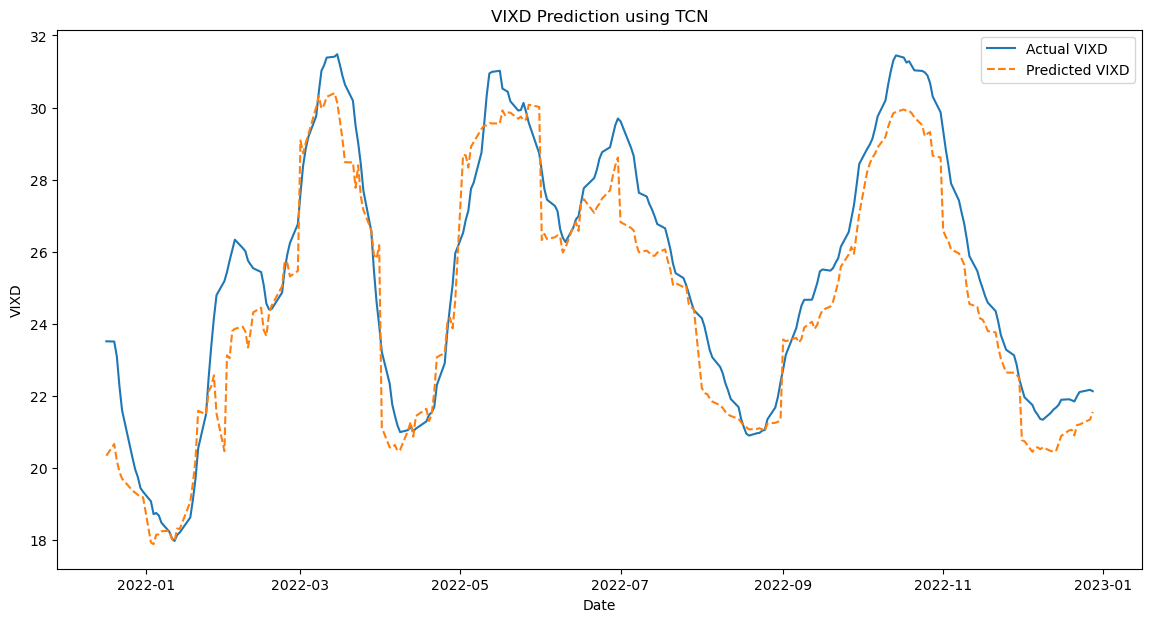

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# 加载情绪结果文件
finbert_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_finbert.xlsx')
textblob_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_textblob.xlsx')
vader_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/sorted_vader.xlsx')

# 加载市场指数数据
spxd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXD.xlsx', sheet_name='Price Data')
spxtrd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/_SPXTRD.xlsx', sheet_name='Price Data')
vixd_data = pd.read_excel('C:/Users/22749/Desktop/UoG/Fintech/Dissertation/Data/VIXD.xlsx', sheet_name='Price Data')

# 确保日期列为datetime类型
finbert_data['Date'] = pd.to_datetime(finbert_data['Date'])
textblob_data['Date'] = pd.to_datetime(textblob_data['Date'])
vader_data['Date'] = pd.to_datetime(vader_data['Date'])
spxd_data['Date'] = pd.to_datetime(spxd_data['Date'])
spxtrd_data['Date'] = pd.to_datetime(spxtrd_data['Date'])
vixd_data['Date'] = pd.to_datetime(vixd_data['Date'])

# 将情绪得分扩展到每日
def expand_to_daily(data):
    daily_data = data.set_index('Date').resample('D').ffill().reset_index()
    return daily_data

finbert_data_daily = expand_to_daily(finbert_data)
textblob_data_daily = expand_to_daily(textblob_data)
vader_data_daily = expand_to_daily(vader_data)

# 合并情绪得分数据
sentiment_data = pd.merge(finbert_data_daily, textblob_data_daily, on='Date', how='outer', suffixes=('_finbert', '_textblob'))
sentiment_data = pd.merge(sentiment_data, vader_data_daily, on='Date', how='outer')

# 合并市场指数数据
market_data = pd.merge(spxd_data, spxtrd_data, on='Date', how='outer', suffixes=('_spxd', '_spxtrd'))
market_data = pd.merge(market_data, vixd_data, on='Date', how='outer')

# 合并所有数据
data = pd.merge(sentiment_data, market_data, on='Date', how='outer')
data.set_index('Date', inplace=True)

# 删除所有包含 NaN 值的行
data = data.dropna()

# 检查合并后的日期范围
print("Merged Data Date Range:")
print(data.index.min(), data.index.max())

X = data[['Overall Positive Sentiment', 'Overall Neutral Sentiment', 'Overall Negative Sentiment', 
          'Polarity', 'Subjectivity', 
          'Positive', 'Neutral', 'Negative', 
          'Average_SPXD', 'Close_SPXD', 'Close_SPXTRD', 'Average_SPXTRD']]
y = data['Average_VIXD'].shift(-1)

# 删除目标变量中的NaN值，并对齐特征变量的索引
y = y.dropna()
X = X.loc[y.index]

# 删除与目标变量对齐后的最后一行
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# 调整特征权重
weights = {
    'Overall Positive Sentiment': 0.7,
    'Overall Neutral Sentiment': 0.1,
    'Overall Negative Sentiment': 0.7,
    'Polarity': 0.7,
    'Subjectivity': 0.1,
    'Positive': 0.7,
    'Neutral': 0.1,
    'Negative': 0.7,
    'Average_SPXD': 1,
    'Close_SPXD': 1,
    'Close_SPXTRD': 1,
    'Average_SPXTRD': 1
}
for col, weight in weights.items():
    X[col] = X[col] * weight

# 确保特征和目标变量的索引对齐
X = X.loc[y.index]
data = data.loc[y.index]  # 同步删除 data 中的对应行

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练集、验证集和测试集
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 转换为张量并添加一个维度用于Conv1D
X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 定义TCN模型
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2, padding='causal', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=32, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
model = build_tcn_model(input_shape)

# 训练模型
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), batch_size=32)

# 评估模型在测试集上的性能
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R^2 Score: {test_r2}')

# 可视化预测结果
predicted_vixd = model.predict(np.expand_dims(X_scaled, axis=2))
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Average_VIXD'], label='Actual VIXD')
plt.plot(data.index[:len(predicted_vixd)], predicted_vixd, label='Predicted VIXD', linestyle='--')
plt.xlabel('Date')
plt.ylabel('VIXD')
plt.title('VIXD Prediction using TCN')
plt.legend()
plt.show()
